<center> <h1> Republic of the Congo - Introductory Analysis </h1> </center>

In [1]:
import ee
import geemap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
ee.Authenticate()
ee.Initialize()

Enter verification code: 4/1AX4XfWgy_ypSYJ4h16eLsUBnzJCYJzNhnhgvu571TubZ9SI5HHPFxZjrsHo

Successfully saved authorization token.


<h2> 1. Imports </h2>

In [3]:
s2 = ee.ImageCollection("COPERNICUS/S2_SR") # main dataset
admin = ee.FeatureCollection("FAO/GAUL_SIMPLIFIED_500m/2015/level0") # for country boundaries
admin2 = ee.FeatureCollection("FAO/GAUL/2015/level2")
nightLights = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG")

# manual point drawings of vegetation, water, and urban areas to be used as training data
vegetation = ee.FeatureCollection(
        [ee.Feature(
            ee.Geometry.Point([15.317372731170673, -4.178902185308254]),
            {
              "landcover": 2,
              "system:index": "0"
            }),
        ee.Feature(
            ee.Geometry.Point([15.326084546051044, -4.17793915662452]),
            {
              "landcover": 2,
              "system:index": "1"
            }),
        ee.Feature(
            ee.Geometry.Point([15.33069794555666, -4.196728702415942]),
            {
              "landcover": 2,
              "system:index": "2"
            }),
        ee.Feature(
            ee.Geometry.Point([15.303025088571554, -4.21831486155012]),
            {
              "landcover": 2,
              "system:index": "3"
            }),
        ee.Feature(
            ee.Geometry.Point([15.209547725069376, -4.2359184640783925]),
            {
              "landcover": 2,
              "system:index": "4"
            }),
        ee.Feature(
            ee.Geometry.Point([15.226337998653253, -4.217472956701684]),
            {
              "landcover": 2,
              "system:index": "5"
            }),
        ee.Feature(
            ee.Geometry.Point([15.25447396732368, -4.18226135505036]),
            {
              "landcover": 2,
              "system:index": "6"
            }),
        ee.Feature(
            ee.Geometry.Point([15.276109867639901, -4.1728338003697045]),
            {
              "landcover": 2,
              "system:index": "7"
            }),
        ee.Feature(
            ee.Geometry.Point([15.184102031111792, -4.305345855806201]),
            {
              "landcover": 2,
              "system:index": "8"
            }),
        ee.Feature(
            ee.Geometry.Point([15.2569159589902, -4.271359751932355]),
            {
              "landcover": 2,
              "system:index": "9"
            })])

water = ee.FeatureCollection(
        [ee.Feature(
            ee.Geometry.Point([15.316751223919528, -4.218596434850652]),
            {
              "landcover": 1,
              "system:index": "0"
            }),
        ee.Feature(
            ee.Geometry.Point([15.319631355276098, -4.248830095972495]),
            {
              "landcover": 1,
              "system:index": "1"
            }),
        ee.Feature(
            ee.Geometry.Point([15.316584405579068, -4.200561595435991]),
            {
              "landcover": 1,
              "system:index": "2"
            }),
        ee.Feature(
            ee.Geometry.Point([15.29312792568675, -4.280628972754523]),
            {
              "landcover": 1,
              "system:index": "3"
            }),
        ee.Feature(
            ee.Geometry.Point([15.267898177460623, -4.29744748604764]),
            {
              "landcover": 1,
              "system:index": "4"
            }),
        ee.Feature(
            ee.Geometry.Point([15.241548156098318, -4.31403024653532]),
            {
              "landcover": 1,
              "system:index": "5"
            }),
        ee.Feature(
            ee.Geometry.Point([15.219493464626304, -4.296420182149353]),
            {
              "landcover": 1,
              "system:index": "6"
            }),
        ee.Feature(
            ee.Geometry.Point([15.215126828350058, -4.297415159303712]),
            {
              "landcover": 1,
              "system:index": "7"
            }),
        ee.Feature(
            ee.Geometry.Point([15.211009216176151, -4.272744853006216]),
            {
              "landcover": 1,
              "system:index": "8"
            }),
        ee.Feature(
            ee.Geometry.Point([15.22145633172788, -4.230245517253194]),
            {
              "landcover": 1,
              "system:index": "9"
            })])

urban = ee.FeatureCollection(
        [ee.Feature(
            ee.Geometry.Point([15.278557855449444, -4.256406437046484]),
            {
              "landcover": 0,
              "system:index": "0"
            }),
        ee.Feature(
            ee.Geometry.Point([15.290617067180401, -4.257947126752471]),
            {
              "landcover": 0,
              "system:index": "1"
            }),
        ee.Feature(
            ee.Geometry.Point([15.286475736461407, -4.250414836666548]),
            {
              "landcover": 0,
              "system:index": "2"
            }),
        ee.Feature(
            ee.Geometry.Point([15.251857792922644, -4.290657103032545]),
            {
              "landcover": 0,
              "system:index": "3"
            }),
        ee.Feature(
            ee.Geometry.Point([15.241640419290205, -4.272236413225311]),
            {
              "landcover": 0,
              "system:index": "4"
            }),
        ee.Feature(
            ee.Geometry.Point([15.23796951216393, -4.273041518854091]),
            {
              "landcover": 0,
              "system:index": "5"
            }),
        ee.Feature(
            ee.Geometry.Point([15.233125153314905, -4.248537072724076]),
            {
              "landcover": 0,
              "system:index": "6"
            }),
        ee.Feature(
            ee.Geometry.Point([15.236923161279993, -4.248060951322166]),
            {
              "landcover": 0,
              "system:index": "7"
            }),
        ee.Feature(
            ee.Geometry.Point([15.22963435890933, -4.250528486273661]),
            {
              "landcover": 0,
              "system:index": "8"
            }),
        ee.Feature(
            ee.Geometry.Point([15.28006804923415, -4.220372888701518]),
            {
              "landcover": 0,
              "system:index": "9"
            })])

In [4]:
# Function to remove cloud and snow pixels from Sentinel-2 SR image
def maskCloudAndShadowsSR(image):
  cloudProb = image.select('MSK_CLDPRB')
  snowProb = image.select('MSK_SNWPRB')
  cloud = cloudProb.lt(10)
  scl = image.select('SCL')
  shadow = scl.eq(3); # 3 = cloud shadow
  cirrus = scl.eq(10); # 10 = cirrus
  # Cloud probability less than 10% or cloud shadow classification
  mask = cloud.And(cirrus.neq(1)).And(shadow.neq(1))
  return image.updateMask(mask)

In [5]:
Map = geemap.Map()
congo = admin.filter(ee.Filter.eq('ADM0_NAME', 'Congo'))
# focusing on Brazzaville (capital/largest city population) to decrease map load times
bv = admin2.filter(ee.Filter.eq('ADM1_NAME', 'Brazzaville'))
Map.centerObject(bv, 12)

<h2> Median Composite </h2>

In [6]:
filtered = s2 \
  .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 30)) \
  .filter(ee.Filter.date('2020-01-01', '2020-12-31')) \
  .filter(ee.Filter.bounds(bv)) \
  .map(maskCloudAndShadowsSR) \
  .select('B.*')

composite = filtered.median().clip(bv)

# Display the input composite.
rgbVis = {
  'min': 0,
  'max': 3000, # ***
  'bands': ['B4', 'B3', 'B2']}

Map.addLayer(composite, rgbVis, 'Median Composite')

<h2> Night Lights </h2>

In [7]:
filtered = nightLights.filter(ee.Filter.date('2020-01-01', '2020-12-31'))
image = ee.Image(filtered.first()).select('avg_rad').clip(bv)
nighttimeVis = {'min': 0.0, 'max': 60.0}
Map.addLayer(image, nighttimeVis, 'Night Lights')

<h2> Spectral Indices </h2>

In [8]:
# Calculate  Normalized Difference Vegetation Index (NDVI)
# 'NIR' (B8) and 'RED' (B4)
ndvi = composite.normalizedDifference(['B8', 'B4']).rename(['ndvi'])
ndviVis = {'min':0, 'max':1, 'palette': ['white', 'green']}
Map.addLayer(ndvi, ndviVis, 'NDVI')

# Calculate Normalized Difference Water Index (NDWI)
# 'GREEN' (B3) and 'NIR' (B8)
ndwi = composite.normalizedDifference(['B3', 'B8']).rename(['ndwi'])
ndwiVis = {'min':0, 'max':1, 'palette': ['white', 'blue']}
Map.addLayer(ndwi, ndwiVis, 'NDWI')

# Calculate Modified Normalized Difference Water Index (MNDWI)
# 'GREEN' (B3) and 'SWIR1' (B11)
mndwi = composite.normalizedDifference(['B3', 'B11']).rename(['mndwi'])
ndwiVis = {'min':0, 'max':0.5, 'palette': ['white', 'blue']}
Map.addLayer(mndwi, ndwiVis, 'MNDWI')

# Calculate Normalized Difference Built-up Index (NDBI)
# 'SWIR1' (B11) and 'NIR' (B8)
ndbi = composite.normalizedDifference(['B11', 'B8']).rename(['ndbi'])
ndbiVis = {'min':0, 'max':1, 'palette': ['white', 'red']}
Map.addLayer(ndbi, ndbiVis, 'NDBI')

<h2> Supervised Classification </h2>

In [9]:
"""
"""
def train_validation_split():
    compiled = urban.merge(water).merge(vegetation)

    # Add a random column and split the GCPs into training and validation set
    compiled = compiled.randomColumn()

    # 70% training, 30% validation
    training = compiled.filter(ee.Filter.lt('random', 0.7))
    validation = compiled.filter(ee.Filter.gte('random', 0.7))

    # Overlay the point on the image to get training data.
    training = composite.sampleRegions(**{
      'collection': training,
      'properties': ['landcover'],
      'scale': 10,
      'tileScale': 16
    })
    
    return training, validation

In [10]:
"""
"""
def classify(cf, training):
    # Train the classifier.
    classifier = cf \
    .train(**{
      'features': training,
      'classProperty': 'landcover',
      'inputProperties': composite.bandNames()
    })

    # Classify the image.
    classified = composite.classify(classifier)
    return classified

In [11]:
# add spectral indice bands to the median composite
composite.addBands(ndvi).addBands(ndwi).addBands(ndbi).addBands(mndwi)

# Normalize the image

# Machine learning algorithms work best on images when all features have
# the same range

# Function to Normalize Image
# Pixel Values should be between 0 and 1
# Formula is (x - xmin) / (xmax - xmin)
#**************************************************************************
def normalize(image):
  bandNames = image.bandNames()
  # Compute min and max of the image
  minDict = image.reduceRegion(**{
    'reducer': ee.Reducer.min(),
    'geometry': bv,
    'scale': 20,
    'maxPixels': 1e9,
    'bestEffort': True,
    'tileScale': 16
  })
  maxDict = image.reduceRegion(**{
    'reducer': ee.Reducer.max(),
    'geometry': bv,
    'scale': 20,
    'maxPixels': 1e9,
    'bestEffort': True,
    'tileScale': 16
  })
  mins = ee.Image.constant(minDict.values(bandNames))
  maxs = ee.Image.constant(maxDict.values(bandNames))

  normalized = image.subtract(mins).divide(maxs.subtract(mins))
  return normalized

composite = normalize(composite)

In [12]:
training, validation = train_validation_split()

classifiers = {
    'SVM': ee.Classifier.libsvm(),
    'Minimum Distance': ee.Classifier.minimumDistance(),
    'CART': ee.Classifier.smileCart(),
    'Gradient Tree Boost': ee.Classifier.smileGradientTreeBoost(20),
    'Naive Bayes': ee.Classifier.smileNaiveBayes(),
    'Random Forest': ee.Classifier.smileRandomForest(20),
}

cfPalette = {
    'min': 0,
    'max': 2,
    'palette': ['red', 'blue', 'green']
}

for label, cf in classifiers.items():
    # Classify the image
    classified = classify(cf, training)
    
    # Add the classified layer to the map
    Map.addLayer(classified, cfPalette, label)
    

Map

Map(center=[-4.236624256999297, 15.259870728294976], controls=(WidgetControl(options=['position', 'transparent…

<h2> Accuracy Assessment </h2>

Test Accuracy: 1
Confusion Matrix: [[5, 0, 0], [0, 4, 0], [0, 0, 2]]


IndexError: tuple index out of range

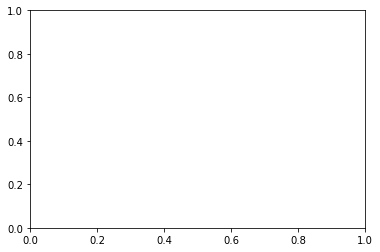

In [13]:
#**************************************************************************
# Accuracy Assessment
#**************************************************************************

# Use classification map to assess accuracy using the validation fraction
# of the overall training set created above.
test = classified.sampleRegions(**{
  'collection': validation,
  'properties': ['landcover'],
  'tileScale': 16, #**********
  'scale': 10,
})

testConfusionMatrix = test.errorMatrix('landcover', 'classification')
cm = testConfusionMatrix.getInfo()
# Printing of confusion matrix may time out. Alternatively, you can export it as CSV
print('Test Accuracy:', testConfusionMatrix.accuracy().getInfo())
print('Confusion Matrix:', cm)

cm = np.array(cf) 
ls = ['Urban', 'Water', 'Vegetation']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ls)
disp.plot()
plt.show()